In [223]:
from os import listdir
from os.path import isfile, join
from pipe import *
import json
from pathlib import Path
import numpy as np

def GetFileStream(path='../worldnews-20170904'):
    # returns {(0,/path/file1), (1,/path/file2), ... }
    files = enumerate(listdir(path))
    for file in files:
        yield (file[0], join(path, file[1]))

@Pipe
def AdornFile(stream):
    # stream is {(0,filepath), (1, filepath),...}
    # return {(0,filepath1,json1), (1, filepath2,json2),...}
    for file in stream:
        yield file + (json.loads(Path(file[1]).read_text(encoding='utf-8')),)

@Pipe
def As_Npy(l):
    return np.array(list(l))

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [224]:
GetFileStream() \
  | AdornFile() \
  | take(3) \
  | as_list()


[(0,
  '../worldnews-20170904\\news_0000001.json',
  {'organizations': [],
   'uuid': '767c7dc963d0263187da888fbfd19cd60b0bc2e8',
   'thread': {'social': {'gplus': {'shares': 0},
     'pinterest': {'shares': 0},
     'vk': {'shares': 0},
     'linkedin': {'shares': 0},
     'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
     'stumbledupon': {'shares': 0}},
    'site_full': 'timesofindia.indiatimes.com',
    'main_image': 'http://timesofindia.indiatimes.com/photo/47529300.cms',
    'site_section': 'http://timesofindia.indiatimes.com/rssfeeds/1898184.cms',
    'section_title': 'China News, News in China, Latest News, Daily News | World News - Times of India',
    'url': 'http://timesofindia.indiatimes.com/world/china/China-plans-to-remove-poverty-by-2020/articleshow/49328137.cms',
    'country': 'IL',
    'title': 'China plans to remove poverty by 2020',
    'performance_score': 0,
    'site': 'indiatimes.com',
    'participants_count': 1,
    'title_full': 'China plans to remove 

In [216]:
X = GetFileStream() \
  | AdornFile()  \
  | take(50)      \
  | as_list()

In [241]:
X = GetFileStream() \
  | AdornFile()  \
  | take(2000)      \
  | select( lambda j: j[2]['title'] ) \
  | select( lambda t: nlp(t).vector ) \
  | select( lambda v: v/np.linalg.norm(v) ) \
  | As_Npy()

X = np.nan_to_num(X)

In [232]:
def GetDocumentTextByIndex(index):
    return GetFileStream() \
      | skip(index) \
      | take(1) \
      | AdornFile() \
      | select( lambda j: j[2]['text'] ) \
      | as_list()
    
def GetDocumentTitleByIndex(index):
    return GetFileStream() \
      | skip(index) \
      | take(1) \
      | AdornFile() \
      | select( lambda j: j[2]['title'] ) \
      | as_list()
      

In [243]:
simmatrix = np.dot(X,X.transpose())

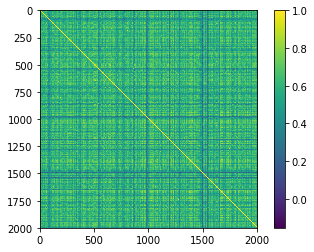

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(simmatrix)
plt.colorbar()

In [200]:
# these docs are VERY similar (hypothesis)
list( np.argwhere(np.logical_and( simmatrix >0, simmatrix < 0.01 ))) \
| take( 15 ) \
| select(lambda x: ( GetDocumentTextByIndex(x[0]),GetDocumentTextByIndex(x[1]) ) ) \
| as_list()

[(['telegraph.co.uk'],
  [' * *\n October 07, 2015, on page 14. Recommended Related Articles Holmes and Watson open U.S. defense of Presidents Cup\nDay wants Presidents showdown with Spieth\nEntities People Phil Mickelson Jim Furyk Jack Nicklaus Jay Haas Countries U.S. Australia South Africa Tournaments Presidents Cup British Open PGA Tour Tour Championship Organizations Royal Melbourne Korea Companies BMW Advertisement']),
 (['telegraph.co.uk'],
  ['\n Recommended Entities People Jacqueline Sutton Ammar Al-Shahbander Locations & natural formations Istanbul Baghdad Political group Foreign Office Countries Britain Iraq Associations & groups United Nations Artifacts Ataturk airport Companies BBC Websites Twitter Advertisement']),
 (['telegraph.co.uk'],
  ['WASHINGTON (AP) — US urges Turkey to uphold due process in the case of jailed Iraqi journalist Mohammed Rasool.']),
 (['telegraph.co.uk'],
  ['The weekend in pictures A selection of the best images from around the world this weekend\nR

In [245]:
list( np.argwhere(np.logical_and( simmatrix >0, simmatrix < 0.3 ))) \
| take( 200 ) \
| as_list()

[array([  0, 166], dtype=int64),
 array([  0, 436], dtype=int64),
 array([  0, 503], dtype=int64),
 array([  0, 629], dtype=int64),
 array([  0, 680], dtype=int64),
 array([  0, 681], dtype=int64),
 array([  0, 709], dtype=int64),
 array([  0, 841], dtype=int64),
 array([  0, 858], dtype=int64),
 array([  0, 927], dtype=int64),
 array([  0, 984], dtype=int64),
 array([   0, 1237], dtype=int64),
 array([   0, 1287], dtype=int64),
 array([   0, 1304], dtype=int64),
 array([   0, 1425], dtype=int64),
 array([   0, 1487], dtype=int64),
 array([   0, 1490], dtype=int64),
 array([   0, 1510], dtype=int64),
 array([   0, 1536], dtype=int64),
 array([   0, 1551], dtype=int64),
 array([   0, 1636], dtype=int64),
 array([   0, 1682], dtype=int64),
 array([   0, 1721], dtype=int64),
 array([   0, 1726], dtype=int64),
 array([   0, 1781], dtype=int64),
 array([   0, 1892], dtype=int64),
 array([   0, 1955], dtype=int64),
 array([ 1, 25], dtype=int64),
 array([ 1, 33], dtype=int64),
 array([ 1, 56]

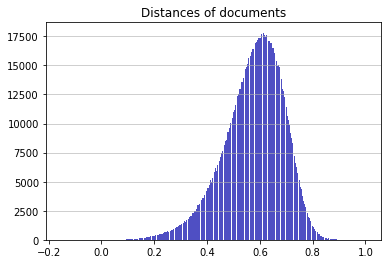

In [248]:
import matplotlib.pyplot as plt

flat_vals = simmatrix[np.triu_indices(2000)]

n, bins, patches = plt.hist(x=flat_vals, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('')
plt.ylabel('')
#plt.ylim(top=4000)
#plt.xlim(right=0.8)
plt.title('Distances of documents')
maxfreq = n.max()

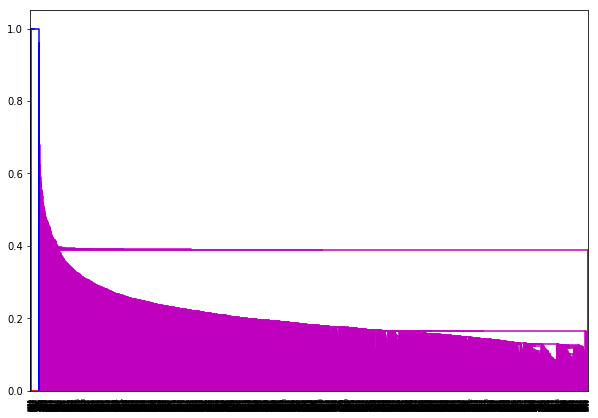

In [187]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  